In [24]:
import matplotlib.gridspec as gridspec
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import find_peaks,argrelextrema
from datetime import date
from numpy.polynomial.polynomial import polyval
from matplotlib import cm,colors,ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("/Users/kipp/Plotting/custom_style.mplstyle")
d = date.isoformat(date.today())
v = 0
def reshape_func(sq1,sq2,E,E_shape):

    x = np.arange(230,1570                             ,dtype = 'int')
    y = 1522*np.ones(x.shape[0]                        ,dtype = 'int')
    k1 = np.arange(x.shape[0]                          ,dtype = 'int')
    x2 = np.arange(1569,901,-1                         ,dtype = 'int') 
    y2 = np.linspace(1522,3045,x2.shape[0]             ,dtype = 'int')
    k2 = k1[-1] + 1 + np.arange(x2.shape[0]            ,dtype = 'int')
    x3 = np.arange(901,236,-1                          ,dtype = 'int') 
    y3 = np.linspace(3045,1522,x3.shape[0]             ,dtype = 'int')
    k3 = k2[-1] + 1 + np.arange(x3.shape[0]            ,dtype = 'int')
    x = np.append(x,[x2])
    y = np.append(y,[y2])
    x = np.append(x,[x3])
    y = np.append(y,[y3])
    E_sq = E.reshape(E_shape,sq1,sq2)
    E_line = E_sq[:,y,x]
    return(E_line,E_sq)
def format_func(value, tick_number):
    if abs(value) <= 10**(-4) and abs(value)!= 0.0:
        return("{:.2E}".format(value))
    else:
        return("{:1.4f}".format(value))
def hc_fin_func(hc,hc_opp,hc_sym):
    if hc_sym == 'sym':
        hc_fin = (hc + hc_opp)/2
    elif hc_sym == 'antisym':
        hc_fin = (hc - hc_opp)/2
    elif hc_sym == 'bare':
        hc_fin = hc
    return(hc_fin)
def col_type_func(m_theta,case):
        #CASE == 0: THETA1=-THETA2 = THETA_NC
        #CASE == 1: THETA1= 0, THETA2 = +/- THETA_NC
        #CASE == 2: THETA1= 0/THETA_NC, THETA2 = THETA_NC/0
        #CASE == 3: THETA1 = +/-THETA_NC THETA2 = -/+THETA_NC
        #IN DEGREES
    if case == 0:
        theta_nc = (m_theta[0] - m_theta[1])/2
        theta_col = (m_theta[0] + m_theta[1])/2
    elif case == 1:
        theta_nc = m_theta[0] - m_theta[1]
        theta_col = m_theta[0]
    elif case == 2:
        theta_nc = m_theta[0] - m_theta[1]
        theta_col = (m_theta[0]+m_theta[1])/2 - theta_nc/2
    elif case == 3:
        theta_nc = (m_theta[0] - m_theta[1])/2
        theta_col = (m_theta[0] + m_theta[1])/2
    return(180./np.pi*theta_col,abs(180./np.pi*theta_nc))
def setup_check(keyword,prefix,fname):
    pattern = keyword + "\s*=\s*['a-z]+|" + keyword + "\s*=\s*(\d+(.\d*)+(.\d*)E\+\d\d)|" + keyword + "\s*=\s*"
    with open(prefix + fname + '/setup.cfg','r') as fin:
        for num,line in enumerate(fin,1):
            s = re.search(pattern,line)
            if s!=None:
                if s.group(2)!=None:
                    val = float(s.group(1))
    return(val)

def EE_diff_min(E_sq,idx_y):
    EE = E_sq[:,idx_x,idx_y]
    return(min(EE[1]) - max(EE[0]))

datesets = ["20190423","20190424","20190425","20190517","20190606","20190611","20190612","20190614","20190618","20190625","20190626","20190627"]
prefixsold = ["/Users/kipp/STB/output_jureca/" + d + "/" for d in datesets]
prefixs = ["/Data/ias-1/kipp/" + d + "/" for d in datesets]
save_prefix = "/Users/kipp/STB/weyl_figures/Weyl_figures/"
coltypes = ['col','noncol']
func_col_types = [1,0,2,3,2,2,2,2,2,2,2,2]
hc_syms = ['sym','antisym']
K_label = ["","$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]
findbool = False
key = 'anticol_theta'
rotation = 'scancol'
rotation2 = 'scancolflip'
seedfname = "path_rel_G-K-Kprime"
save_strs = ["datafrom_" + ds for ds in datesets]
inputname = seedfname + '_' + key + '_' + rotation
inputname2 = seedfname + '_' + key + '_' + rotation2
files = 51
j = 0
peakexp = 3
symdict = {'sym':0,'antisym':files//2}
symstringdict = {'sym': 'symmetric','antisym':'antisymmetric'}
colthetalabeldict = {'col':'$\Theta_{col}$ [deg.]','noncol':'$\Theta_{nc}$ [deg.]'}
coltypesdict = dict(list(zip(datesets,func_col_types)))
symhclabeldict = {'sym':r'$\sigma_{sym,xy}$ [$\frac{e^2}{h}$]','antisym':r'$\sigma_{asym,xy}$ [$\frac{e^2}{h}$]','bare':r"$\sigma_{xy}$ [$\frac{e^2}{h}$]"}
labeldict = {'pwd':r"$\frac{\Delta\sigma}{\Delta\Theta}$",'peak':"$\sigma$"}
factordict = {'m_theta':180./np.pi,'lambda':1.,'t_so':1.}


236 1.0
band gap: 0.5936
[1.6406 1.4661] [1.4661 1.6406] [1.4661 1.4661]
[0. 0.] [0. 0.] [0. 0.]
1.4 1.4
0.4 0.4


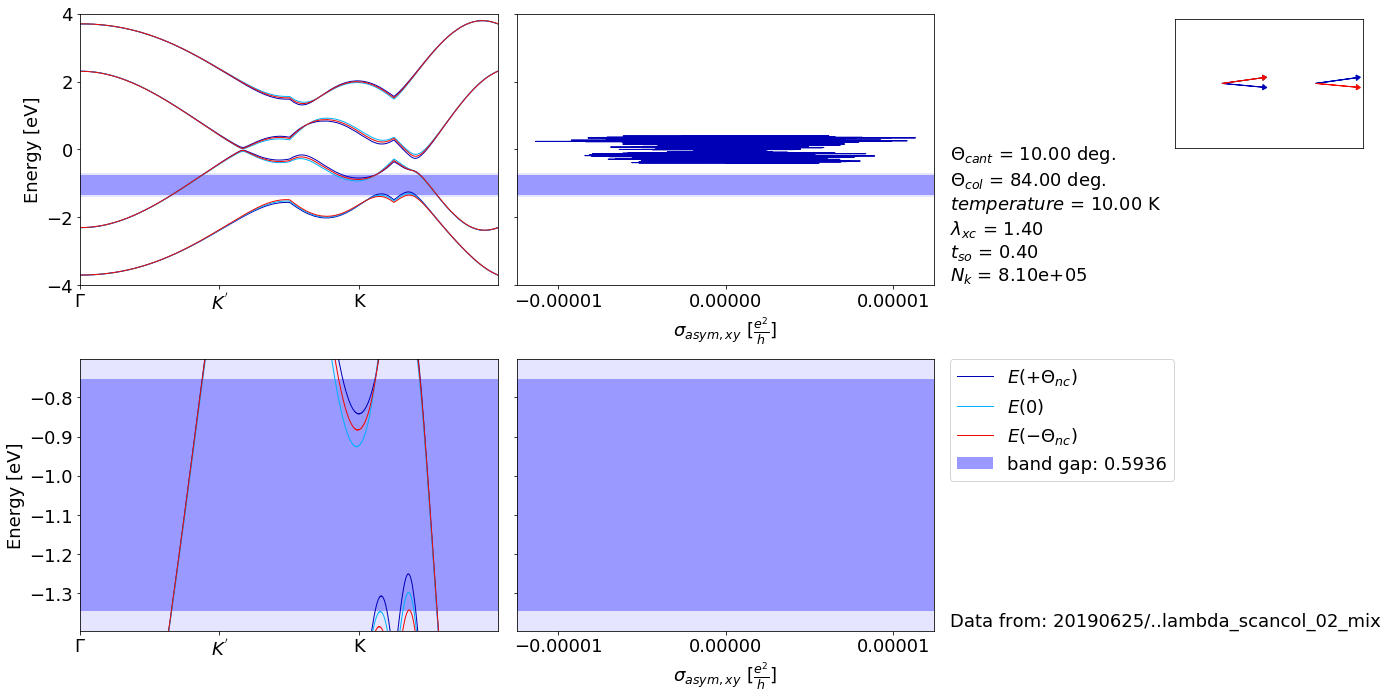

In [32]:
norm = colors.Normalize(vmin = 0, vmax = 20)
lims = [-4.0,4.0]
zoomlims = [-0.1,0.1]

m,n,o = 1,6,18
#j,k,l = 
prefix2 = prefixs[1]
prefix = prefixs[9]
dateset = datesets[9]
#inputname = "test_lambda_tso"
#inputname2 = "test_lambda_tsoflip"
#inputname_null = "test_lambda_tso_col"
#inputname_null = "path_rel_G-K-Kprime_anticol_theta_scananticol_00_lambda_02_t_so_01"
symtype = "antisym"
j = 2
key = "_mix"
inputname_null = "path_rel_G-K-Kprime_lambda_anticol_theta_col_{:02}".format(j) + key
inputname = "path_rel_G-K-Kprime_lambda_anticol_theta_scancol_{:02}".format(j) + key
inputname2 = "path_rel_G-K-Kprime_lambda_anticol_theta_scancolflip_{:02}".format(j) + key
#inputname = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scancol_{}".format(24)
#inputname = "path_rel_G-K-Kprime_inplane_fm_3"
#inputname2 = "path_rel_G-K-Kprime_inplane_fm_3_flip"
#inputname = "path_rel_G-K-Kprime_anticol_theta_scananticol_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
#inputname2 = "path_rel_G-K-Kprime_anticol_theta_scananticolflip_{:02}_lambda_{:02}_t_so_{:02}".format(j,k,l)
colmap = 'jet'
#inputname = "test_tso_lambda"
#inputname2 = "test_tso_lambdaflip"
#inputname_null = "test_tso_lambda_col"
E_sq = np.load(prefix + inputname + '/band_E.npy')
E_null_sq = np.load(prefix + inputname_null + '/band_E.npy')
E_opp_sq = np.load(prefix + inputname2 + '/band_E.npy')


E,E_sq = reshape_func(3200,1600,E_sq,4)
E_null,E_null_sq = reshape_func(3200,1600,E_null_sq,4)
E_opp,E_opp_sq = reshape_func(3200,1600,E_opp_sq,4)

idx_x = 1522 + np.arange(-100,200,1)
idx_y = 236 
idx_y_arr = 236 + np.arange(-100,200,1)

min_E = 1.0
for j in idx_y_arr:
    EE_min = EE_diff_min(E_sq,j)
    #EE_null_min = EE_diff_min(E_null_sq,j)
    #EE_opp_min = EE_diff_min(E_opp_sq,j)
    if EE_min < min_E:
        min_j = j
        min_E = EE_min
    #plt.plot(j,EE_min,"b.")
    #plt.axvline(236)
print(min_j,min_E)
E_diff = E[1] - E[0]
E_diff_sort = np.argsort(E_diff[E_diff>0])
min_idx = E_diff_sort[0]
zoomlims2 = [E[0,min_idx],E[1,min_idx]]
zoomlims = [zoomlims2[0]-0.05,zoomlims2[1]+0.05]
minbandgapstr = "min. band gap: {:1.4f}".format(min_E)
bandgapstr = "band gap: {:1.4f}".format(E_diff[min_idx])
print(bandgapstr)
num = 4
hc = np.load(prefix + inputname + '/hall_cond.npy')#'/hall_cond_iter={:05}.npy'.format(num))#
hc_opp = np.load(prefix + inputname2 + '/hall_cond.npy')#'/hall_cond_iter={:05}.npy'.format(num))#
hc_null = np.load(prefix + inputname_null + '/hall_cond.npy')#'/hall_cond_iter={:05}.npy'.format(num))#
hc_E = np.load(prefix + inputname + '/hall_cond_E.npy')

m_theta = np.load(prefix + inputname + '/m_theta.npy')
m_theta_opp = np.load(prefix + inputname2 + '/m_theta.npy')
m_theta_null = np.load(prefix + inputname_null + '/m_theta.npy')

m_phi = np.load(prefix + inputname + '/m_phi.npy')
m_phi_opp = np.load(prefix + inputname2 + '/m_phi.npy')
m_phi_null = np.load(prefix + inputname_null + '/m_phi.npy')

print(m_theta,m_theta_opp,m_theta_null)
print(m_phi,m_phi_opp,m_phi_null)
theta_col,theta_nc = col_type_func(m_theta,coltypesdict[dateset])
phi_col,phi_nc = col_type_func(m_phi,coltypesdict[dateset])
dx = np.sin(m_theta)
dz = np.cos(m_theta)
dx_opp = np.sin(m_theta_opp)
dz_opp = np.cos(m_theta_opp)
dx_col = np.sin(m_theta_null)
dz_col = np.cos(m_theta_null)

#eps = setup_check('epsilon',prefix,inputname + '/')
kpts = 300**2*9#setup_check('kpts_per_step',prefix,inputname + '/')
#lmda_KM = setup_check('lambda_KM',prefix,inputname + '/')
lmda = setup_check('lambda',prefix,inputname + '/')
lmda_null = setup_check('lambda',prefix,inputname_null + '/')
print(lmda,lmda_null)
t_so = setup_check('t_so',prefix,inputname + '/')
t_so_null = setup_check('t_so',prefix,inputname_null + '/')
print(t_so,t_so_null)
temperature = setup_check('temperature',prefix,inputname + '/')
thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
phistr = "$\Phi_{cant}$" + " = {:1.2f} deg.".format(phi_nc) + "\n$\Phi_{col}$" + " = {:1.2f} deg.".format(phi_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)# + "\n" +"$\lambda_{KM}$" + " = {0:1.2f}".format(lmda_KM)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
kptsstr = "$N_k$" + " = {0:1.2e}".format(kpts)
#epsstr = "$\eps$" + " = {0:e}".format(eps)
textstr = thetastr + "\n" + temperaturestr + "\n" + lambdastr + "\n" + t_sostr + "\n"  + kptsstr# + "\n"  + phistr 
npoints_E = E.shape[1]
K = np.arange(npoints_E)


fig,ax = plt.subplots(nrows = 2, ncols = 3,figsize = (3*6.4,2*4.8),constrained_layout = True,sharey = 'row')
for axes in [ax[0,0],ax[1,0]]:
    #axes.axhspan(ymin = zoomlims2[0], ymax = zoomlims2[1],facecolor = "b",alpha = 0.1,label = bandgapstr)
    #axes.axhspan(ymin = zoomlims[0], ymax = zoomlims[1],facecolor = "b",alpha = 0.1)
    axes.plot(K,E[0],color =cm.get_cmap(colmap)(norm(m)),label = "$E(+\Theta_{nc})$")
    axes.plot(K,E_null[0],color =cm.get_cmap(colmap)(norm(n)),label = "$E(0)$")
    axes.plot(K,E_opp[0],color =cm.get_cmap(colmap)(norm(o)),label = "$E(-\Theta_{nc})$")
    axes.xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
    axes.set_xticklabels(K_label)
    #axes.legend(fontsize = 18,bbox_to_anchor=(1.1, 1.05))
    axes.set_ylabel("Energy [eV]",fontsize = 18)
    axes.margins(x=0, y=-0.0)
for j in range(1,4):
    for axes in [ax[0,0],ax[1,0]]:
        axes.plot(K,E[j],color =cm.get_cmap(colmap)(norm(m)))
        axes.plot(K,E_opp[j],color =cm.get_cmap(colmap)(norm(n)))
        axes.plot(K,E_null[j],color =cm.get_cmap(colmap)(norm(o)))
ax[1,0].set_ylim(zoomlims)
ax[0,1].set_ylim(lims)
#ax[0,0].axhspan(ymin = lims[0], ymax = lims[1],facecolor = "b",alpha = 0.1)

for axes in [ax[0,1],ax[1,1]]:
    #axes.axhspan(ymin = zoomlims[0], ymax = zoomlims[1],facecolor = "b",alpha = 0.1)
    axes.plot(hc_fin_func(hc,hc_opp,symtype),hc_E,color =cm.get_cmap(colmap)(norm(m)))
    axes.set_xlabel(symhclabeldict[symtype],fontsize = 18)
    axes.xaxis.set_major_locator(plt.MaxNLocator(3))
    axes.tick_params(labelsize = 18)

for axes in [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]:
    #zl1 = np.sort(np.append(zoomlims,zoomlims2))
    axes.axhspan(ymin = zoomlims2[0], ymax = zoomlims2[1],facecolor = "b",alpha = 0.4, label = bandgapstr)
    axes.axhspan(ymin = zoomlims2[0] - 0.05, ymax = zoomlims2[0],facecolor = "b",alpha = 0.1)
    axes.axhspan(ymin = zoomlims2[1], ymax = zoomlims2[1] + 0.05,facecolor = "b",alpha = 0.1)
    #axes.axhspan(ymin = zl1[1], ymax = zl1[2],facecolor = "b",alpha = 0.2,label = bandgapstr)
    
h,l = ax[0,0].get_legend_handles_labels()
ax[1,2].legend(h,l, loc = "upper left",borderaxespad=0,fontsize = 18)
for axes in [ax[0,2]]:
    axes.set_axis_off()
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    axins = inset_axes(axes, width=2.6, height=1.8,loc = 'upper right')
    axins.tick_params(tick1On = False,labelleft=False, labelbottom=False)
    axins.set_xlim(-1.8,2.8)
    axins.set_ylim(-1.2,1.2)
    axins.arrow(1.65, 0, dx_col[1],dz_col[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(-0.65, 0, dx_col[0],dz_col[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(n)))
    axins.arrow(1.65, 0, dx[1],dz[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(-0.65, 0, dx[0],dz[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(m)))
    axins.arrow(1.65, 0, dx_opp[1],dz_opp[1], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axins.arrow(-0.65, 0, dx_opp[0],dz_opp[0], head_width=0.1, head_length=0.1,color = cm.get_cmap(colmap)(norm(o)))
    axes.text(xlims[0], ylims[0], textstr,size = 18,
                 horizontalalignment='left',
                 verticalalignment='bottom')
for axes in [ax[1,2]]:
    axes.set_axis_off()
    ylims = axes.get_ylim()
    xlims = axes.get_xlim()
    inputnamedummy = inputname
    newmatch = re.search('lambda',inputname)
    newmatch2 = re.search('scan',inputname)
    newmatch3 = re.search('col',inputname)
    string = ''
    if newmatch!= None:
        string = string + inputname[newmatch.start():newmatch.end()]
    if newmatch2!= None:
        string = string + "_" + inputname[newmatch2.start():]
    elif newmatch2 == None:
        while newmatch3!=None:
            newmatch3 = re.search('col',inputnamedummy)
            if newmatch3!=None:
                inputnamedummy = inputnamedummy[newmatch3.end():]
        string = string + '_col_' + inputnamedummy 
    string = "Data from: " + dateset + "/.." + string
    axes.text(xlims[0], ylims[0],string,size = 18,
            horizontalalignment='left',
            verticalalignment='bottom',wrap = 'True')

#with PdfPages(save_prefix + d + '_' + inputname + '_' + symtype + '_' + 'bandscompare.pdf') as pdf:
#    pdf.savefig(fig)

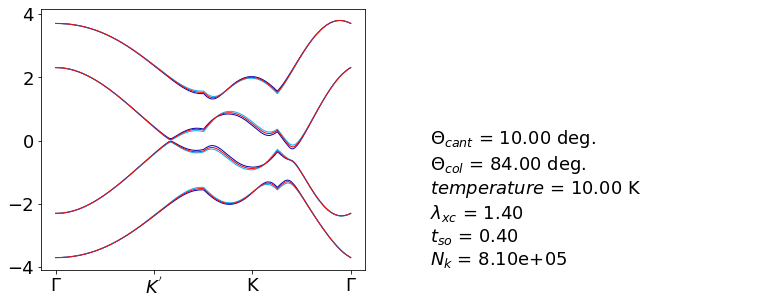

In [38]:
fig, axes = plt.subplots(ncols = 2,figsize = (2*6.4,4.8))
for j in range(4):
    axes[0].plot(K,E[j],color =cm.get_cmap(colmap)(norm(m)))
    axes[0].plot(K,E_opp[j],color =cm.get_cmap(colmap)(norm(n)))
    axes[0].plot(K,E_null[j],color =cm.get_cmap(colmap)(norm(o)))
ylims = axes[1].get_ylim()
xlims = axes[1].get_xlim()
axes[0].xaxis.set_major_locator(plt.MultipleLocator(npoints_E//3))
axes[0].set_xticklabels(K_label)
axes[1].set_axis_off()
axes[1].text(xlims[0], ylims[0],textstr,size = 18,
        horizontalalignment='left',
        verticalalignment='bottom',wrap = 'True')
with PdfPages(save_prefix + d + '_' + inputname + '_' + 'bands.pdf') as pdf:
    pdf.savefig(fig)

1.4


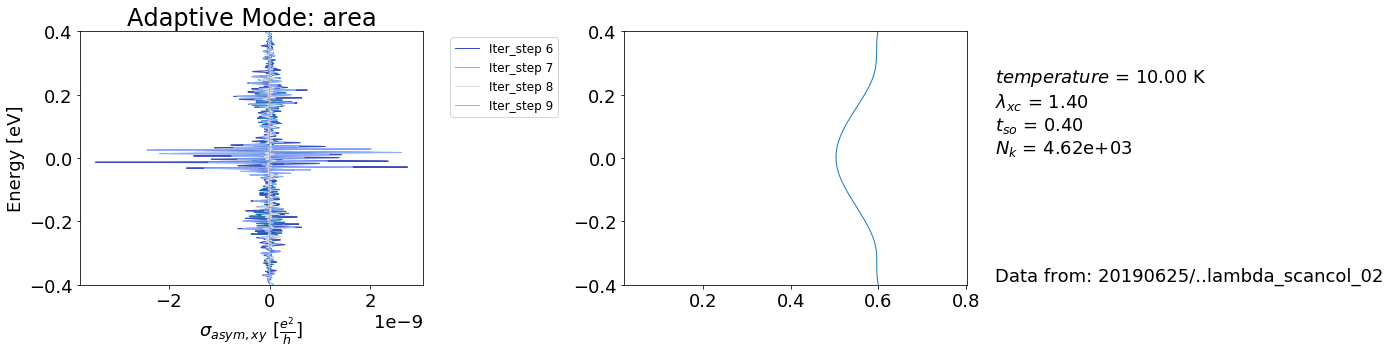

In [45]:
mmin = 6
mmax = 10
colmap = 'coolwarm'
symtype = "antisym"
key = ""
prefix = prefixs[9]
modesdict = {"":"area","_mix":"mixed","_weight":"weight","_phi":"mix"}
inputname = "path_rel_G-K-Kprime_lambda_anticol_theta_scancol_{:02}".format(2) + key
inputname2 = "path_rel_G-K-Kprime_lambda_anticol_theta_scancolflip_{:02}".format(2) + key
hc_E = np.load(prefix + inputname + '/hall_cond_E.npy')
hc_fin = np.load(prefix + inputname + '/hall_cond.npy')
hc_fin_opp = np.load(prefix + inputname2 + '/hall_cond.npy')
DOS_opp = np.load(prefix + inputname2 + '/DOS.npy')
DOS_E = np.load(prefix + inputname2 + '/DOS_E.npy')
hc_finn = hc_fin_func(hc_fin,hc_fin_opp,symtype)
fig,(ax,ax3,ax2) = plt.subplots(ncols = 3,figsize = (3*6.4,4.8),constrained_layout = True)
norm = colors.Normalize(vmin = mmin, vmax = mmax)
ax3.plot(DOS_opp,DOS_E)
ax.plot(hc_finn,hc_E)
for k in range(mmin,mmax):
    hc = np.load(prefix + inputname + '/hall_cond_iter={:05}.npy'.format(k))
    hc_opp = np.load(prefix + inputname2 + '/hall_cond_iter={:05}.npy'.format(k))
    ax.plot(hc_fin - hc,hc_E,color = cm.get_cmap(colmap)(norm(k)),label = "Iter_step {:d}".format(k))
    #ax.plot(hc_finn - hc_fin_func(hc,hc_opp,symtype),hc_E,color = cm.get_cmap(colmap)(norm(k)),label = "Iter_step {:d}".format(k))
    #ax.plot(hc_fin_opp - hc_opp,hc_E,color = cm.get_cmap(colmap)(norm(k)),label = "Iter_step {:d}".format(k))
ax.legend(loc = "upper right",bbox_to_anchor = (1.41,1.0),fontsize = 12)
ax.set_xlabel(symhclabeldict[symtype],fontsize = 18)
ax.set_ylabel("Energy [eV]",fontsize = 18)
ax.set_title("Adaptive Mode: " + modesdict[key])
ax2.set_axis_off()
ylims = ax2.get_ylim()
xlims = ax2.get_xlim()
inputnamedummy = inputname
newmatch = re.search('lambda',inputname)
newmatch2 = re.search('scan',inputname)
newmatch3 = re.search('col',inputname)
string = ''
if newmatch!= None:
    string = string + inputname[newmatch.start():newmatch.end()]
if newmatch2!= None:
    string = string + "_" + inputname[newmatch2.start():]
elif newmatch2 == None:
    while newmatch3!=None:
        newmatch3 = re.search('col',inputnamedummy)
        if newmatch3!=None:
            inputnamedummy = inputnamedummy[newmatch3.end():]
    string = string + '_col_' + inputnamedummy 
string = "Data from: " + dateset + "/.." + string
ax2.text(xlims[0], ylims[0],string,size = 18,
       horizontalalignment='left',
       verticalalignment='bottom',wrap = 'True')
kpts = 68**2
lmda = setup_check('lambda',prefix,inputname + '/')
print(lmda)
t_so = setup_check('t_so',prefix,inputname + '/')
temperature = setup_check('temperature',prefix,inputname + '/')
#thetastr = "$\Theta_{cant}$" + " = {:1.2f} deg.".format(theta_nc) + "\n$\Theta_{col}$" + " = {:1.2f} deg.".format(theta_col)
#phistr = "$\Phi_{cant}$" + " = {:1.2f} deg.".format(phi_nc) + "\n$\Phi_{col}$" + " = {:1.2f} deg.".format(phi_col)
lambdastr = "$\lambda_{xc}$" + " = {0:1.2f}".format(lmda)
t_sostr = "$t_{so}$" + " = {0:1.2f}".format(t_so)
temperaturestr = "$temperature$" + " = {0:1.2f} K".format(temperature)
kptsstr = "$N_k$" + " = {0:1.2e}".format(kpts)
#epsstr = "$\eps$" + " = {0:e}".format(eps)
textstr = temperaturestr + "\n" + lambdastr + "\n" + t_sostr + "\n"  + kptsstr#thetastr + "\n" + # + "\n"  + phistr 
ax2.text(xlims[0], ylims[0]+0.5,textstr,size = 18,
       horizontalalignment='left',
       verticalalignment='bottom',wrap = 'True')
for axes in [ax,ax3]:
    axes.set_ylim(-0.4,0.4)
with PdfPages(save_prefix + d + '_' + inputname + '_' + symtype + '_' + 'iter_compare.pdf') as pdf:
    pdf.savefig(fig)

In [16]:
np.sqrt(4.744**2+0.838**2)

4.817445381112276

In [22]:
k = np.array([4.744*10**-2,-0.838])

In [23]:
np.linalg.norm(k)

0.8393417382687459